                      Coefficient
alcohol                  0.289665
sulphates                0.075057
fixed acidity            0.016985
citric acid              0.000000
residual sugar           0.000000
chlorides               -0.000000
free sulfur dioxide      0.000000
density                 -0.000000
pH                      -0.000000
total sulfur dioxide    -0.032669
volatile acidity        -0.168554

                      Coefficient
alcohol                  0.289665
volatile acidity        -0.168554
sulphates                0.075057
total sulfur dioxide    -0.032669
fixed acidity            0.016985
citric acid              0.000000
residual sugar           0.000000
chlorides               -0.000000
free sulfur dioxide      0.000000
density                 -0.000000
pH                      -0.000000

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxi

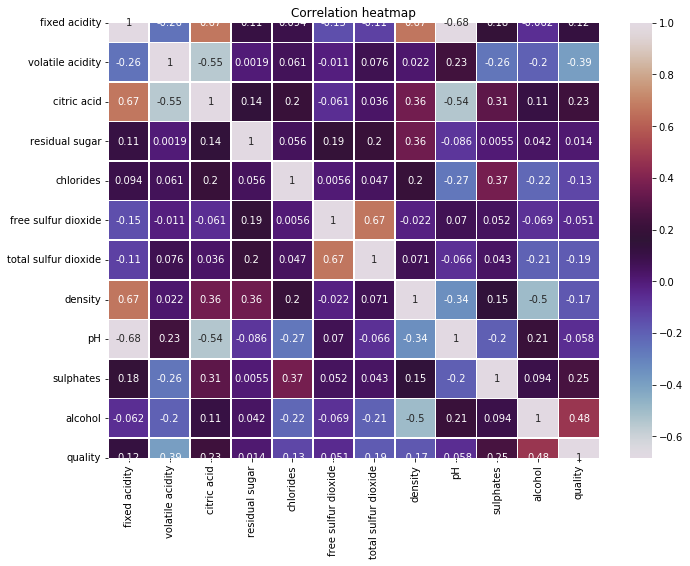

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('winequality-red.csv', delimiter=';') # učitavanje podataka
# podjela skupa podataka na skup značajka i skup oznaka
X=df.iloc[:,:-1].values 
Y=df.iloc[:,-1].values 

# podjela skupa podataka na skup za treniranje i testiranje
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3)

# skaliranje podatka za treniranje
x_train_scaled = StandardScaler().fit_transform(x_train)

# stvaranje modela linearne regresije s Lasso regulacijom 
Linear_regression = linear_model.Lasso(alpha=0.05)   
Linear_regression.fit(x_train_scaled,y_train) # treniranje modela

# Ispis vrijednosti težina značajki nakon treniranja modela
coefficients=pd.DataFrame(Linear_regression.coef_,df.columns[:-1])
coefficients.columns=['Coefficient']
print(coefficients.sort_values(by='Coefficient', ascending=False)) # prema silaznoj vrijednsoti
print()
print(coefficients.iloc[ (-coefficients.Coefficient.abs()).argsort()]) # prema apsolutnoj vrijednosti
print()

# Ispis vrijednosti korelacije značajki s kvalitetom
correlations = df.corr()['quality'].drop('quality')
correlations.iloc[ (-correlations.abs()).argsort()]
print(correlations)

# Iscrtavanje vizualne reprazentacije korelacija različitih značajki 
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="twilight")
plt.title("Correlation heatmap")
plt.show()

print()